In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

In [2]:
def Jacobian(theta1, theta2, k, omega1, omega2):
    '''
    Jacobian matrix 
    '''
    return np.array([[k*np.cos(theta1-theta2) + np.cos(theta1 - omega1), -k*np.cos(theta1-theta2)], [-k*np.cos(theta1-theta2), k*np.cos(theta1-theta2) + np.cos(theta2 - omega2)]])

def is_stable(theta1, theta2, k, omega1, omega2):
    '''
    Check if the given theta1 and theta2 are stable.
    Return True if they are stable, False otherwise.
    '''
    J = Jacobian(theta1, theta2, k, omega1, omega2)
    # check first element of J is positive and the determinant of J is positive
    return (J[0,0]>0) and (np.linalg.det(J)>0)

# Compromise ($J_{1}=J_{2}=J_{max}$)

$\theta_1-\theta_2<<1, \theta_1-\omega_1<<1, \theta_2-\omega_2<<1$

In [3]:
df_comp = pd.read_csv('stab_analysis/compromise_20.0theta0_big.csv')

t1 = df_comp['theta1'].values
t2 = df_comp['theta2'].values

for i in range(len(t1)):
    # Convert string to array
    t1[i] = np.fromstring(t1[i][1:-1], sep=' ')
    t2[i] = np.fromstring(t2[i][1:-1], sep=' ')
    
    # Boolean mask of non-NaN elements
    mask = ~np.isnan(t1[i]) & ~np.isnan(t2[i])

    # New arrays with only non-NaN elements
    t1[i] = t1[i][mask]
    t2[i] = t2[i][mask]

  # put nan in empty arrays
    if len(t1[i])==0:
        t1[i] = np.nan
    else:
      t1[i] = t1[i][0]
    if len(t2[i])==0:
      t2[i] = np.nan
    else:
      t2[i] = t2[i][0]

# put t1 and t2 as columns in df 
df_comp['theta1'] = t1
df_comp['theta2'] = t2

df_comp

,K,omega1,omega2,theta1,theta2,omega_diff
0,0.1,0.000000,0,0.0,0.0,0.000000
1,0.1,0.017453,0,0.01527,0.00218,0.017453
2,0.1,0.034907,0,0.032,0.00291,0.034907
3,0.1,0.052360,0,0.048,0.00436,0.052360
4,0.1,0.069813,0,0.064,0.00582,0.069813
...,...,...,...,...,...,...
107995,119.9,3.054326,0,3.09814,-0.04382,3.054326
107996,119.9,3.071779,0,3.10683,-0.03505,3.071779
107997,119.9,3.089233,0,3.11552,-0.02629,3.089233
107998,119.9,3.106686,0,3.12421,-0.01753,3.106686


## Stability

In [4]:
# check if the given elements of theta1 and theta2 in df are stable and store the result in a new column
df_comp['stable'] = df_comp.apply(lambda row: is_stable(row['theta1'], row['theta2'], row['K'], row['omega1'], row['omega2']), axis=1)

In [5]:

# select row with omega_diff smaller than 0.05, and abs(theta1-oemga1) and abs(theta2-omega2) smaller than 0.05
df_small = df_comp[(df_comp['omega_diff']<2) & (abs(df_comp['theta1']-df_comp['omega1'])<2) & (abs(df_comp['theta2']-df_comp['omega2'])<2) & (df_comp['K']<20)]
df_small

,K,omega1,omega2,theta1,theta2,omega_diff,stable
0,0.1,0.000000,0,0.0,0.0,0.000000,True
1,0.1,0.017453,0,0.01527,0.00218,0.017453,True
2,0.1,0.034907,0,0.032,0.00291,0.034907,True
3,0.1,0.052360,0,0.048,0.00436,0.052360,True
4,0.1,0.069813,0,0.064,0.00582,0.069813,True
...,...,...,...,...,...,...,...
17856,19.9,0.628319,0,0.32174,0.30658,0.628319,True
17857,19.9,0.645772,0,0.33067,0.3151,0.645772,True
17858,19.9,0.663225,0,0.3396,0.32362,0.663225,True
17859,19.9,0.680678,0,0.34853,0.33215,0.680678,True


In [6]:
# for each row add a column as function of K, omega1, omega2
df_small['theta1_approx'] = df_small.apply(lambda row: (row['K']+1)/(2*row['K']+1)*row['omega1'] + row['K']/(2*row['K']+1)*row['omega2'], axis=1)
df_small['theta2_approx'] = df_small.apply(lambda row: (row['K']+1)/(2*row['K']+1)*row['omega2'] + row['K']/(2*row['K']+1)*row['omega1'], axis=1)
df_small

,K,omega1,omega2,theta1,theta2,omega_diff,stable,theta1_approx,theta2_approx
0,0.1,0.000000,0,0.0,0.0,0.000000,True,0.000000,0.000000
1,0.1,0.017453,0,0.01527,0.00218,0.017453,True,0.015999,0.001454
2,0.1,0.034907,0,0.032,0.00291,0.034907,True,0.031998,0.002909
3,0.1,0.052360,0,0.048,0.00436,0.052360,True,0.047997,0.004363
4,0.1,0.069813,0,0.064,0.00582,0.069813,True,0.063995,0.005818
...,...,...,...,...,...,...,...,...,...
17856,19.9,0.628319,0,0.32174,0.30658,0.628319,True,0.321859,0.306459
17857,19.9,0.645772,0,0.33067,0.3151,0.645772,True,0.330800,0.314972
17858,19.9,0.663225,0,0.3396,0.32362,0.663225,True,0.339740,0.323485
17859,19.9,0.680678,0,0.34853,0.33215,0.680678,True,0.348681,0.331998


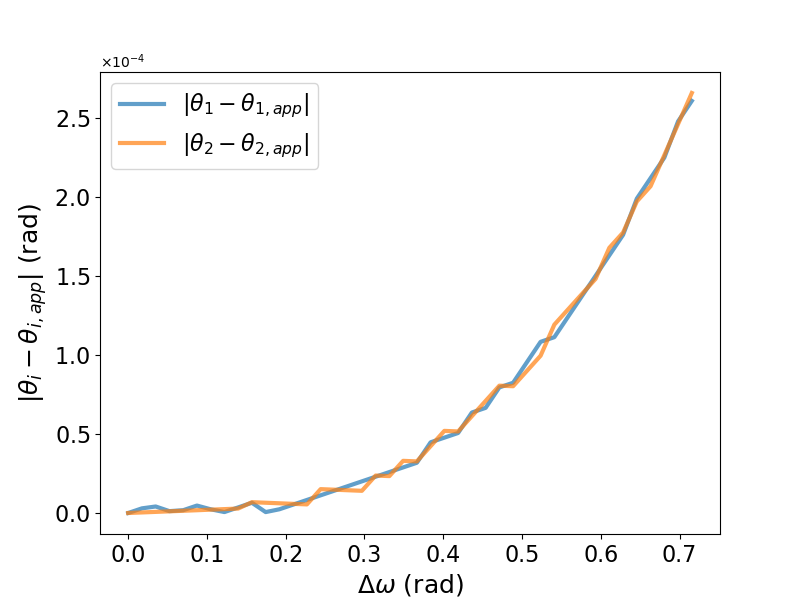

In [16]:
# for fixed K, plot (theta1-theta1_approx) and (theta2-theta2_approx) and  as function of omega_diff
df_small_K = df_small[round(df_small['K'],1)==12.1]
df_small_K

# plot (theta1-theta1_approx) and (theta2-theta2_approx) and  as function of omega_diff
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_small_K['omega_diff'], abs(df_small_K['theta1']-df_small_K['theta1_approx']), label=r'$|\theta_1-\theta_{1,app}|$', lw=3, alpha=0.7)
ax.plot(df_small_K['omega_diff'], abs(df_small_K['theta2']-df_small_K['theta2_approx']), label=r'$|\theta_2-\theta_{2,app}|$', lw=3, alpha=0.7)
ax.set_xlabel(r'$\Delta\omega$ (rad)', fontsize=18)
ax.set_ylabel(r'$|\theta_i-\theta_{i,app}|$ (rad)', fontsize=18)

# set y axis tick in the form 1e-3
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#set tick si
ax.tick_params(axis='both', which='major', labelsize=16)
# set title
# ax.set_title('Comparison between small angle approx.\n'+r'and numerical solution ($K=19.7$)', fontsize=18)
ax.legend(fontsize=16)
plt.show()
# plt.savefig('../img/small_angles_check.pdf', dpi=100)

In [ ]:
np

# Decision ($J_{1}=J_{max}, J_{2}=0$)

$\theta_1-\theta_2<<1, \theta_1-\omega_1<<1$

Analitially is trivial